In [26]:
import pandas as pd
from pandas import read_csv 

from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('sales-of-shampoo-over-a-three-ye.csv', header=0, parse_dates=True, index_col='Month')

<ipython-input-26-f9439bfc7937>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


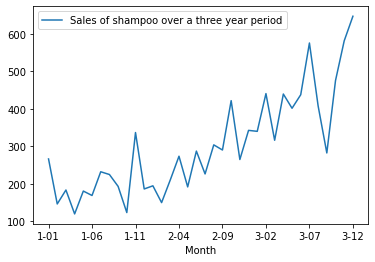

In [27]:
series.plot()
pyplot.show()

In [28]:
X = series.values
X

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3],
       [339.7],
       [440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [282. ],
       [475.3],
       [581.3],
       [646.9]])

In [33]:
size_x = int(len(X) * 0.60)
print(len(X))
print(size_x)

36
21


In [34]:
train_x, test_x = X[0:size], X[size:len(X)]

In [35]:
history = [x for x in train_x]
predictions = list()
for t in range(len(test_x)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

C:\Users\Aarya\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=272.964480, expected=421.600000
predicted=290.313924, expected=264.500000
predicted=349.117790, expected=342.300000
predicted=306.512880, expected=339.700000
predicted=387.376414, expected=440.400000
predicted=348.154063, expected=315.900000
predicted=386.308839, expected=439.300000
predicted=356.082026, expected=401.300000
predicted=446.379471, expected=437.400000
predicted=394.737308, expected=575.500000
predicted=434.915455, expected=407.600000
predicted=507.923427, expected=282.000000
predicted=498.917256, expected=475.300000
predicted=521.044200, expected=581.300000
predicted=485.132008, expected=646.900000
Test MSE: 9834.135


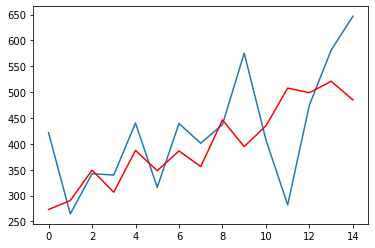

In [36]:
pyplot.plot(test_x)
pyplot.plot(predictions, color='red')
pyplot.show()